In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import time
import datetime

In [ ]:
ds = ".\\DS\\out\\df_full.csv"
df = pd.read_csv(ds)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [34]:
label = df['Label']

In [35]:
labels = label.unique()
labels

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Infiltration', 'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Bot', 'DDoS', 'PortScan'],
      dtype=object)

In [36]:
counts = label.value_counts()
counts

Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

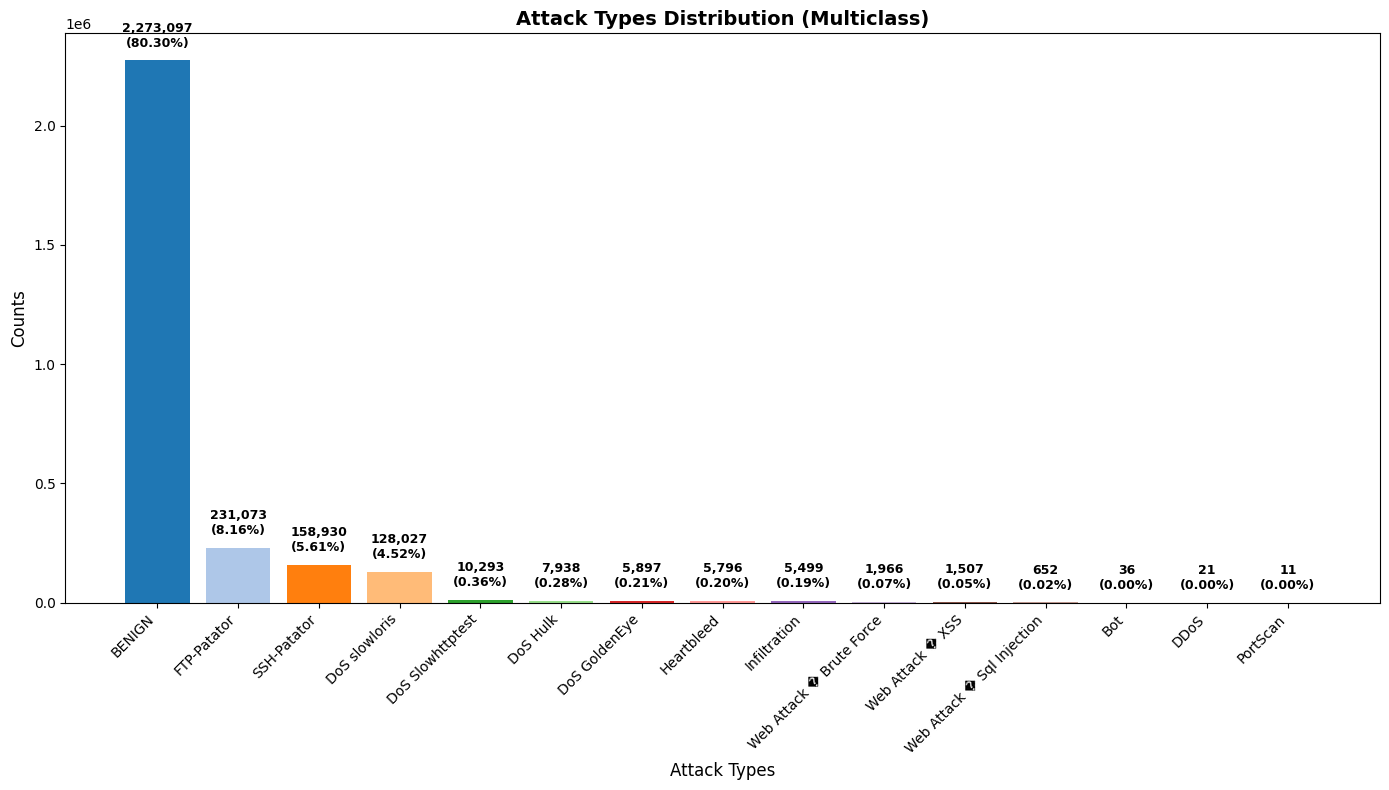

In [37]:
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

colors = plt.cm.tab20.colors[:len(labels)]

# Plot the bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(labels, counts, color=colors)

# Add counts and percentages *above* each bar
for bar, count, percentage in zip(bars, counts, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * max(counts),
             f'{count:,}\n({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# Add labels and title
plt.title('Attack Types Distribution (Multiclass)', fontsize=14, fontweight='bold')
plt.xlabel('Attack Types', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

In [41]:
is_attack = df.loc[:, "Label"].map(lambda lbl: 0 if lbl == "BENIGN" else 1)
labels = is_attack.unique()
labels

array([0, 1])

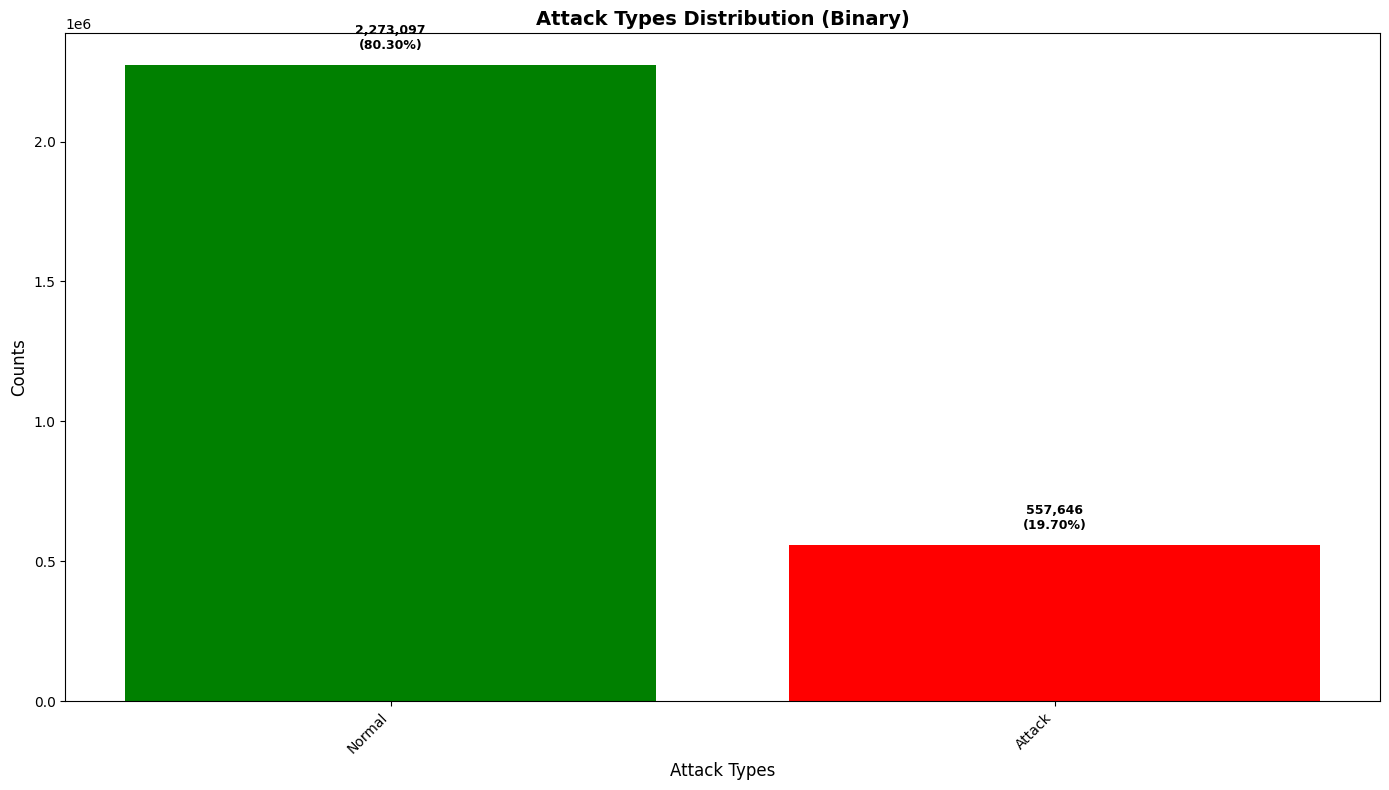

In [44]:
is_attack = df.loc[:, "Label"].map(lambda lbl: 'Normal' if lbl == "BENIGN" else 'Attack')
labels = is_attack.unique()
counts = is_attack.value_counts()
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

colors = {'green','red' }

# Plot the bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(labels, counts, color=colors)

# Add counts and percentages *above* each bar
for bar, count, percentage in zip(bars, counts, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02 * max(counts),
             f'{count:,}\n({percentage:.2f}%)', 
             ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# Add labels and title
plt.title('Attack Types Distribution (Binary)', fontsize=14, fontweight='bold')
plt.xlabel('Attack Types', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()